<a href="https://colab.research.google.com/github/noahcw99/MLE-Exponential-Distrubution/blob/main/noahwelsh_mle_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pantelis/aiml-common/blob/master/assignments/mle/mle_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Parameter Estimation

RUBRIC:

1. If you provide just the plots/code, you will be granted 50% of the points. To win the remaining 50% you will need clear documentation.

2. We need to see a clear explanation of all the stages of developing the solutions which means that you need to explain the code in a way that the writeup is understood by fellow students.

3. Type inline with your Colab notebook your tutorial explanations. Equations can be typed in markdown using Latex syntax notation. If you prefer plain Python you can also include markdown as a separate file but you do need to ensure that all plots are inline to that markdown document and are parsed correctly by Github.

4. Submit in the learning management system of your school (Canvas, Brightspace etc.) by first sharing the Colab or Github repo with the TA so that they can open it without any access restrictions. Any notebook that cant be accessed will receive the grade of 0. 

## Intro:

**What is the exponential distribution?**

The exponential distribution is a probability distribution that describes time between events in a Poisson process. There is a strong relationship between the Poisson distribution and the Exponential distribution. For example, let’s say a Poisson distribution models the number of births in a given time period. The time in between each birth can be modeled with an exponential distribution (Young & Young, 1998).

**Poisson vs Exponential?**

Let’s say a Youtube channel is interested in the number of views per hour. Arrivals per hour has a Poisson 120 arrival rate, which means that 120 viewers arrive per hour. This could also be said that “The expected mean inter-arrival time is 0.5 minutes”, because a viewer can be expected every 1/2 minute (30 seconds).

The exponential distribution models this process, so we could write:
Poisson 120 = Exponential 0.5

The units for the Poisson process are viewers and the units for the exponential are minutes.


**Videos that may help:**
1.  https://www.youtube.com/watch?v=p3T-_LMrvBc&ab_channel=StatQuestwithJoshStarmer
2. https://www.youtube.com/watch?v=2kg1O0j1J9c&ab_channel=zedstatistics




## Part 1 (40 points):

**A)** Let X = amount of time (in minutes) a ice cream man gets a new customer at his cart. The time is known to have an exponential distribution with the average amount of time between a new customer being four minutes. 

Plot the probablity density function of the exponential distribution of this ice cream man getting a customer every 4 minutes. (20 points)

You may use the Python libraries to calculate the exponential distribution and to plot. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

# \begin{align}
       \ f(x)=λe^{-λx} \\
       λ=0.25, X=time
    \end{align}

# Using the scipy.stats library I was able to generate a pdf for my y-axis using lambda = 4 (where it is automatically made into 1/4 during the equation). Plotting this equation on the y-axis I made the x-axis go to 20 minutes where the curve began to near 0.

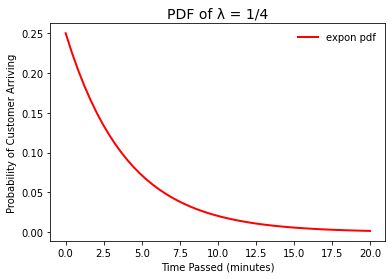

In [ ]:
#Problem 1A)

#begin with imports used
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

#create figure of plot
fig, ax = plt.subplots(1, 1)
#generate interval for x
x = np.linspace(0, 20)

#plot y axis as expon.pdf(x, scale=4), where scale=4 is the mean plotted as lambda (1/4)
plt.plot(x, expon.pdf(x, scale=4),'r-', lw=2, alpha=1, label='expon pdf')

#title plot and label axis
plt.ylabel('Probability of Customer Arriving')
plt.xlabel('Time Passed (minutes)')
plt.title('PDF of λ = 1/4', fontsize=14)
ax.legend(loc='best', frameon=False)

#display plot
plt.show()

**B)** Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically. Does it look similar to the graph above? (20 points)

# Used the numpy library import to generate X samples from the exponential distribution where X = 200 and rate = 4. After saving those 200 generated samples to a variabe, I used plt.hist to plot them

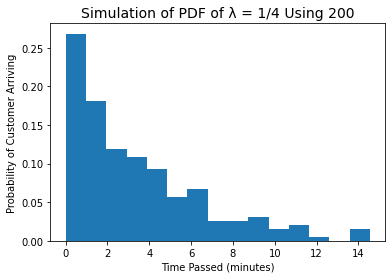

In [ ]:
#Problem 1B)

#begin with imports used
import numpy as np
import matplotlib.pyplot as plt

#generate X samples where X = 200 and rate = 4
samples = np.random.exponential(scale=4, size=200)

#plot histogram using samples
plt.hist(samples, 15, density = True)

#title plot and label axis
plt.ylabel('Probability of Customer Arriving')
plt.xlabel('Time Passed (minutes)')
plt.title('Simulation of PDF of λ = 1/4 Using 200', fontsize=14)

plt.show()

## Part 2 (60 points)

Assume that you are given the customer data generated in Part 1, implement a Gradient Descent algorithm from scratch that will estimate the Exponential distribution according to the Maximum Likelihood criterion.

Answer the following:

1. Plot the negative log likelihood of the exponential distribution. (20 points)
2. What is the lambda MLE of the generated data? (20 points)
3. Plot the estimated lambda vs iterations to showcase convergence towards the true lambda (20 points)


Read this article to obtain the likelihood and negative log likelihood function of the exponential distribution: https://www.statlect.com/fundamentals-of-statistics/exponential-distribution-maximum-likelihood


# \begin{align}
        \ n \mathrm{ln}(λ)-λ \sum_{j-1}^n x_j \\
        \ n=sample \hspace{2mm} size, λ = randomly \hspace{2mm} generated  \hspace{2mm}lambdas, \sum_{j-1}^n x_j = sum \hspace{2mm} of \hspace{2mm}X \hspace{2mm} samples
    \end{align}

# Used the same X samples generated in problem #1B, generating 200 λ between 0 and 1 to create my negative log likelihood array which will represent the y-axis, whereas the x-axis will just be the possible values of λ. Using the above formula I plugged in the variables for each random lambda generated to create my array, and plotted it against λ.

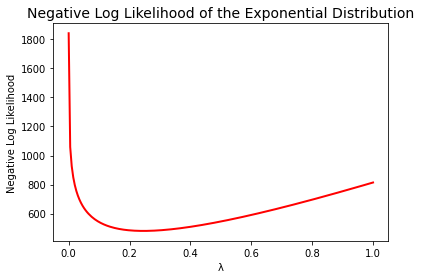

In [ ]:
#Problem 2.1

#begin with imports used
import math
import numpy as np
import matplotlib.pyplot as plt

#generate X samples where n = 200 and rate = 4
samples = np.random.exponential(scale=4, size=200)

#generate random lambdas between 0 and 1
randomLambda = np.linspace(start=0.0001, stop=1, num=200)

#take sum of all samples
samplesSum = np.sum(samples)

#declare array for negative log likelihood before filling with values from formula
negLogLikelihood = []

#using the negative log likelihood formula, fill using values given from the randomly generated data
for eachLambda in randomLambda:
  negLogLikelihood.append(-((len(randomLambda) * np.log(eachLambda)) - (eachLambda * samplesSum)))

#plot y axis as expon.pdf(x, scale=4), where scale=4 is the mean plotted as lambda (1/4)
plt.plot(randomLambda, negLogLikelihood,'r-', lw=2, alpha=1, label='expon pdf')

#title plot and label axis
plt.ylabel('Negative Log Likelihood')
plt.xlabel('λ')
plt.title('Negative Log Likelihood of the Exponential Distribution', fontsize=14)
ax.legend(loc='best', frameon=False)

#display plot
plt.show()

# \begin{align}
        𝜆_n = \frac{n}{ \sum_{j-1}^n x_j} \\
        n=sample \hspace{2mm}size, \sum_{j-1}^n x_j = sum \hspace{2mm} of \hspace{2mm}X \hspace{2mm} samples
    \end{align}

# Using the same generated samples from previous problems, and then taking the sum of those generated samples and plugging them into the above formulas gives the lambda MLE of the generated data.

In [ ]:
#Problem 2.2

#begin with imports used
import numpy as np

#generate X samples where n = 200 and rate = 4
samples = np.random.exponential(scale=4, size=200)

#take sum of all samples
samplesSum = np.sum(samples)

#plug two values into above lambda MLE formula
lambdaMLE = len(samples)/samplesSum

print(lambdaMLE)

0.2235972057718953
